<a href="https://colab.research.google.com/github/Ima406/2024_Geoinformatique_I/blob/main/zone_tampon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      id ABREVIATIO    CM  CODE_CH CODE_COM CODE_VD_N2   COS   DATE_EV  \
0   1198       None  None       12   120101       1201  None  19840718   
1   1196       None  None       12   120101       1201  None  19840718   
2  21509       None  None       12   120101       1201  None  19840718   
3  21510       None  None       12   120101       1201  None  19840718   
4  42025       None  None       12   120101       1201  None  19840718   

  DATE_FIN                      DESIGN_CH  ... REMARQ_TYP SHAPE_AREA  \
0     None  Zones d'activités économiques  ...       None    215.460   
1     None  Zones d'activités économiques  ...       None    143.740   
2     None  Zones d'activités économiques  ...       None    928.484   
3     None  Zones d'activités économiques  ...       None   5887.905   
4     None  Zones d'activités économiques  ...       None    128.950   

  SHAPE_LEN SOUS_THEME   SPB  STATUT_JUR  SURFACE SYMBOLE zid  \
0    88.456       None  None  En vigueur   215.46    None

<ipython-input-4-2a455672807d>:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_500m = buffer_500m.unary_union
<ipython-input-4-2a455672807d>:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_1km = buffer_1km.unary_union
<ipython-input-4-2a455672807d>:24: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_5km = buffer_5km.unary_union


<Axes: >

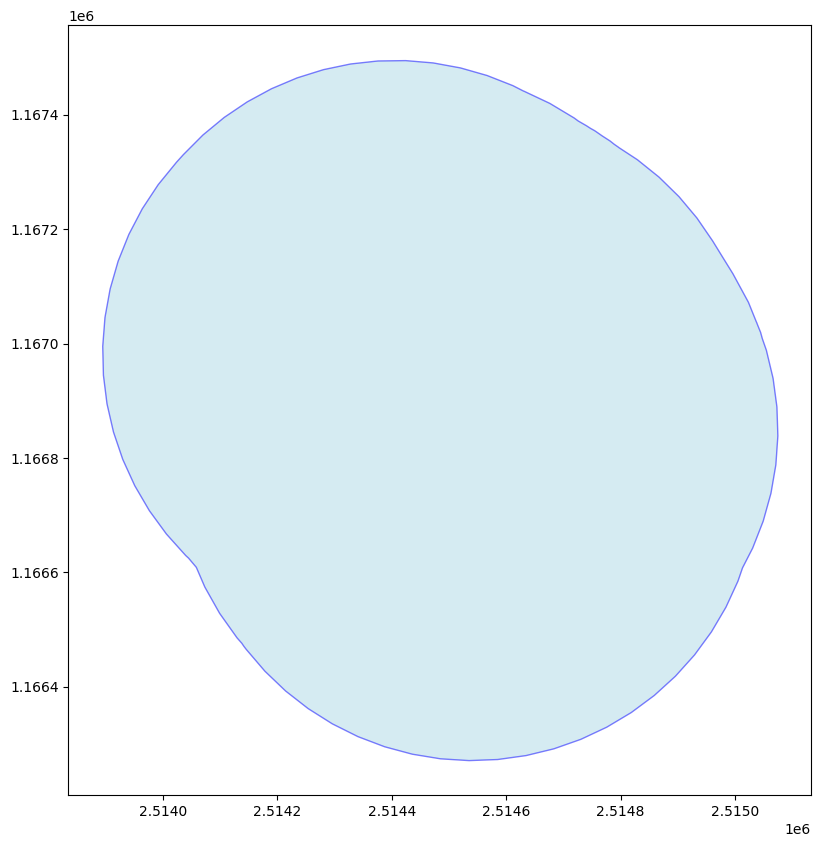

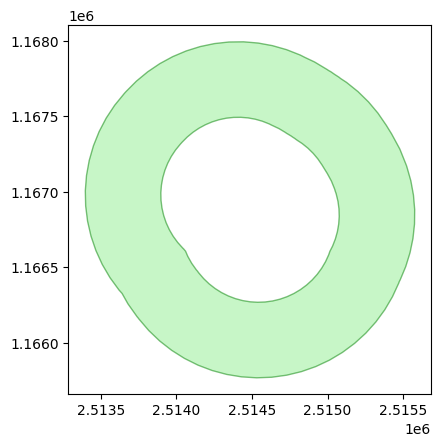

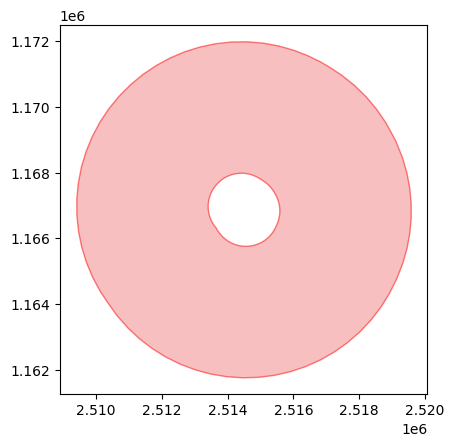

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon
import pyogrio

# Charger le fichier GeoPackage et lister les couches
gpkg_file = "geoinf-proj-ze-8100.gpkg"  # Remplacez par le chemin de votre fichier GeoPackage


# Charger la couche de la zone industrielle, supposée être un polygone ou un ensemble de polygones
# Remplacez 'zone_industrielle' par le nom exact de la couche que vous voulez utiliser
gdf = gpd.read_file(gpkg_file, layer='ze_8100')  # Charger la couche

# Afficher les premières lignes pour vérifier les données
print(gdf.head())

# Calcul des zones tampons pour chaque périmètre
buffer_500m = gdf.buffer(500)  # Zone tampon de 500 m
buffer_1km = gdf.buffer(1000)  # Zone tampon de 1 km
buffer_5km = gdf.buffer(5000)  # Zone tampon de 5 km

# Fusionner les zones tampons
buffer_500m = buffer_500m.unary_union
buffer_1km = buffer_1km.unary_union
buffer_5km = buffer_5km.unary_union

# Créer les "anneaux" en utilisant la différence
buffer_1km_500m = buffer_1km.difference(buffer_500m)  # Zone entre 500m et 1 km
buffer_5km_1km = buffer_5km.difference(buffer_1km)  # Zone entre 1 km et 5 km

# Création des GeoDataFrames pour visualisation ou export
gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=gdf.crs)
gdf_1km_500m = gpd.GeoDataFrame(geometry=[buffer_1km_500m], crs=gdf.crs)
gdf_5km_1km = gpd.GeoDataFrame(geometry=[buffer_5km_1km], crs=gdf.crs)

# Sauvegarder les résultats en fichiers shapefiles
gdf_500m.to_file("buffer_500m.shp")
gdf_1km_500m.to_file("buffer_1km_500m.shp")
gdf_5km_1km.to_file("buffer_5km_1km.shp")

# Affichage des résultats
gdf_500m.plot(edgecolor="blue", facecolor="lightblue", alpha=0.5, figsize=(10, 10))
gdf_1km_500m.plot(edgecolor="green", facecolor="lightgreen", alpha=0.5)
gdf_5km_1km.plot(edgecolor="red", facecolor="lightcoral", alpha=0.5)




In [5]:
import geopandas as gpd
from shapely.geometry import Polygon
import pyogrio

# Charger le fichier GeoPackage et lister les couches
gpkg_file = "geoinf-proj-ze-8100.gpkg"  # Remplacez par le chemin de votre fichier GeoPackage


# Charger la couche de la zone industrielle, supposée être un polygone ou un ensemble de polygones
# Remplacez 'zone_industrielle' par le nom exact de la couche que vous voulez utiliser
gdf = gpd.read_file(gpkg_file, layer='ze_8100')  # Charger la couche

# Afficher les premières lignes pour vérifier les données
print(gdf.head())

# Calcul des zones tampons pour chaque périmètre
buffer_500m = gdf.buffer(500)  # Zone tampon de 500 m
buffer_1km = gdf.buffer(1000)  # Zone tampon de 1 km
buffer_5km = gdf.buffer(5000)  # Zone tampon de 5 km

# Fusionner les zones tampons
buffer_500m = buffer_500m.unary_union
buffer_1km = buffer_1km.unary_union
buffer_5km = buffer_5km.unary_union

# Créer les "anneaux" en utilisant la différence
buffer_1km_500m = buffer_1km.difference(buffer_500m)  # Zone entre 500m et 1 km
buffer_5km_1km = buffer_5km.difference(buffer_1km)  # Zone entre 1 km et 5 km

# Création des GeoDataFrames pour visualisation ou export
gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=gdf.crs)
gdf_1km_500m = gpd.GeoDataFrame(geometry=[buffer_1km_500m], crs=gdf.crs)
gdf_5km_1km = gpd.GeoDataFrame(geometry=[buffer_5km_1km], crs=gdf.crs)

# Sauvegarder les résultats en fichiers shapefiles
gdf_500m.to_file("buffer_500m.shp")
gdf_1km_500m.to_file("buffer_1km_500m.shp")
gdf_5km_1km.to_file("buffer_5km_1km.shp")


      id ABREVIATIO    CM  CODE_CH CODE_COM CODE_VD_N2   COS   DATE_EV  \
0   1198       None  None       12   120101       1201  None  19840718   
1   1196       None  None       12   120101       1201  None  19840718   
2  21509       None  None       12   120101       1201  None  19840718   
3  21510       None  None       12   120101       1201  None  19840718   
4  42025       None  None       12   120101       1201  None  19840718   

  DATE_FIN                      DESIGN_CH  ... REMARQ_TYP SHAPE_AREA  \
0     None  Zones d'activités économiques  ...       None    215.460   
1     None  Zones d'activités économiques  ...       None    143.740   
2     None  Zones d'activités économiques  ...       None    928.484   
3     None  Zones d'activités économiques  ...       None   5887.905   
4     None  Zones d'activités économiques  ...       None    128.950   

  SHAPE_LEN SOUS_THEME   SPB  STATUT_JUR  SURFACE SYMBOLE zid  \
0    88.456       None  None  En vigueur   215.46    None

<ipython-input-5-2f98db0f448a>:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_500m = buffer_500m.unary_union
<ipython-input-5-2f98db0f448a>:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_1km = buffer_1km.unary_union
<ipython-input-5-2f98db0f448a>:24: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_5km = buffer_5km.unary_union


In [17]:
import geopandas as gpd
from shapely.geometry import Polygon
import pyogrio

# Charger le fichier GeoPackage et lister les couches
gpkg_file = "geoinf-proj-ze-8100.gpkg"  # Remplacez par le chemin de votre fichier GeoPackage


# Charger la couche de la zone industrielle, supposée être un polygone ou un ensemble de polygones
# Remplacez 'zone_industrielle' par le nom exact de la couche que vous voulez utiliser
gdf = gpd.read_file(gpkg_file, layer='ze_8100')  # Charger la couche

# Calcul des zones tampons pour chaque périmètre
buffer_500m = gdf.buffer(500)  # Zone tampon de 500 m
buffer_1km = gdf.buffer(1000)  # Zone tampon de 1 km
buffer_5km = gdf.buffer(5000)  # Zone tampon de 5 km

# Fusionner les zones tampons
buffer_500m = buffer_500m.unary_union
buffer_1km = buffer_1km.unary_union
buffer_5km = buffer_5km.unary_union

# Créer les "anneaux" en utilisant la différence
buffer_1km_500m = buffer_1km.difference(buffer_500m)  # Zone entre 500m et 1 km
buffer_5km_1km = buffer_5km.difference(buffer_1km)  # Zone entre 1 km et 5 km

# Création des GeoDataFrames pour visualisation ou export
gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=gdf.crs)
gdf_1km_500m = gpd.GeoDataFrame(geometry=[buffer_1km_500m], crs=gdf.crs)
gdf_5km_1km = gpd.GeoDataFrame(geometry=[buffer_5km_1km], crs=gdf.crs)

# Sauvegarder les résultats en fichiers shapefiles
gdf_500m.to_file("buffer_500m.shp")
gdf_1km_500m.to_file("buffer_1km_500m.shp")
gdf_5km_1km.to_file("buffer_5km_1km.shp")


<ipython-input-17-343abefc40ee>:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_500m = buffer_500m.unary_union
<ipython-input-17-343abefc40ee>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_1km = buffer_1km.unary_union
<ipython-input-17-343abefc40ee>:21: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_5km = buffer_5km.unary_union


In [20]:
import geopandas as gpd
import pyogrio

# Charger le fichier GeoPackage des communes et de ma zone industrielle
gpkg_file = "geoinf-proj-ze-8100.gpkg"
gpkg_file2 = "swissBOUNDARIES3D_1_5_LV95_LN02.gpkg"

# Charger la couche des communes pour toute la Suisse
communes_gdf = gpd.read_file(gpkg_file2, layer='tlm_hoheitsgebiet')

# Vérifier que la projection est la bonne (ici EPSG:2056 pour la Suisse)
communes_gdf = communes_gdf.to_crs(epsg=2056)

# Charger la couche des zones industrielles
gdf_zone_industrielle = gpd.read_file(gpkg_file, layer='ze_8100')


# Dictionnaire des géométries des zones tampons avec le fichier calculé plus tot
zi_buf = {
    '500m': gpd.read_file("buffer_500m.shp"),  # Remplacez par le chemin de votre shapefile 500m
    '1km': gpd.read_file("buffer_1km_500m.shp"),    # Remplacez par le chemin de votre shapefile 1km
    '5km': gpd.read_file("buffer_5km_1km.shp")     # Remplacez par le chemin de votre shapefile 5km
}

zi_buf_gdf = {
    k: poly.to_crs(epsg=2056)  # Convertir directement en EPSG:2056 si nécessaire
    for k, poly in zi_buf.items()
}

# Intersection des zones tampon avec les communes
zi_buf_cmnes = {
    k: gpd.overlay(zi_gdf, communes_gdf, how='intersection')
    for k, zi_gdf in zi_buf_gdf.items()
}




